In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('ggplot')

In [45]:
df = pd.read_csv('../data/statcast_04_04_2022_10_03_2022.csv')

In [46]:
print(df.shape)
display(df.head(10))
#df.to_csv('combined_data.csv', index=False)

(695196, 92)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2022-10-02,93.5,1.70,5.95,"Zastryzny, Rob",663993,642239,strikeout,foul_tip,...,8,3,8,3,8,Standard,Standard,167.0,0.000,-0.084
1,CU,2022-10-02,80.9,2.06,5.59,"Zastryzny, Rob",663993,642239,NaN,ball,...,8,3,8,3,8,Standard,Standard,273.0,0.000,0.014
2,FF,2022-10-02,92.3,1.65,5.93,"Zastryzny, Rob",663993,642239,NaN,foul,...,8,3,8,3,8,Standard,Standard,157.0,0.000,0.000
3,FF,2022-10-02,94.3,1.65,5.93,"Zastryzny, Rob",663993,642239,NaN,ball,...,8,3,8,3,8,Standard,Standard,159.0,0.000,0.011
4,FF,2022-10-02,93.4,1.81,5.93,"Zastryzny, Rob",663993,642239,NaN,called_strike,...,8,3,8,3,8,Standard,Standard,156.0,0.000,-0.023
5,CU,2022-10-02,79.6,1.93,5.76,"Zastryzny, Rob",663993,642239,NaN,swinging_strike,...,8,3,8,3,8,Standard,Standard,282.0,0.000,-0.017
6,CU,2022-10-02,78.4,1.95,5.71,"Zastryzny, Rob",608369,642239,field_out,hit_into_play,...,8,3,8,3,8,Infield shift,Standard,256.0,0.002,-0.112
7,FF,2022-10-02,94.8,1.68,5.99,"Zastryzny, Rob",608369,642239,NaN,ball,...,8,3,8,3,8,Infield shift,Standard,159.0,0.000,0.011
8,FC,2022-10-02,86.9,1.83,5.80,"Zastryzny, Rob",608369,642239,NaN,foul,...,8,3,8,3,8,Infield shift,Standard,207.0,0.000,0.000
9,CU,2022-10-02,80.4,1.91,5.70,"Zastryzny, Rob",608369,642239,NaN,swinging_strike,...,8,3,8,3,8,Infield shift,Standard,287.0,0.000,-0.031


In [56]:
# Filter for first pitch
first_pitch_df = df[(df.balls == 0) &
                   (df.strikes == 0)]

# filter columns
columns = ['game_date', 'player_name', 'batter', 'pitcher','zone',
       'stand', 'p_throws', 'home_team', 'away_team', 'plate_x', 'plate_z',
       'outs_when_up', 'inning', 'inning_topbot',
       'pitch_name',
       'home_score', 'away_score', 'delta_home_win_exp', 'delta_run_exp']

first_pitch_df = first_pitch_df[columns]
first_pitch_df = first_pitch_df.dropna(axis=0)
first_pitch_df['labeled_pitch'] = ['Fastball' if 'Fastball' in str(x) else 'Off Speed' for x in first_pitch_df.pitch_name]
print(df.columns)


Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [57]:
first_pitch_df.to_csv('../data/first_pitch_data.csv')

# Hypothesis 7: Most common first pitch changed from beginning to end

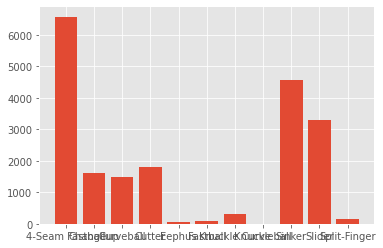

In [49]:
#sns.barplot(first_pitch_df.pitch_name)
group_pitch = pd.DataFrame(first_pitch_df.groupby(['pitch_name']).count()['game_date']).reset_index()

plt.bar(group_pitch.pitch_name, group_pitch.game_date)
plt.show()

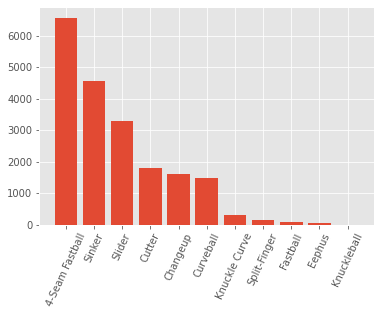

In [50]:
# Slightly improved
group_pitch = pd.DataFrame(first_pitch_df.groupby(['pitch_name']).count()['game_date']).reset_index()
group_pitch = group_pitch.sort_values('game_date', ascending=False)
plt.bar(group_pitch.pitch_name, group_pitch.game_date)
plt.xticks(rotation = 65)
plt.show()

/Users/dimitriospsaltos/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


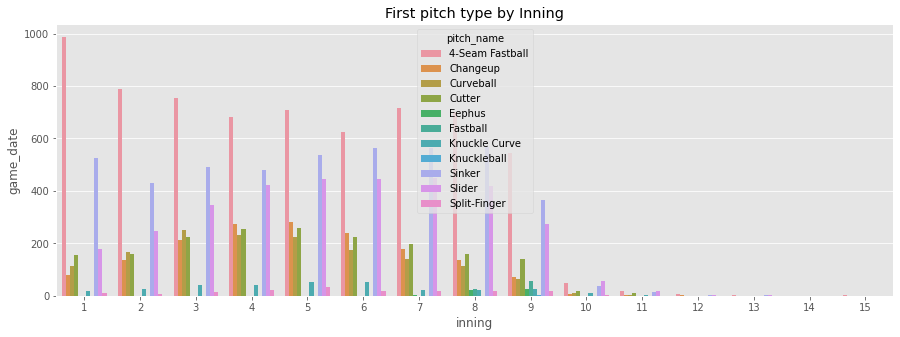

/Users/dimitriospsaltos/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


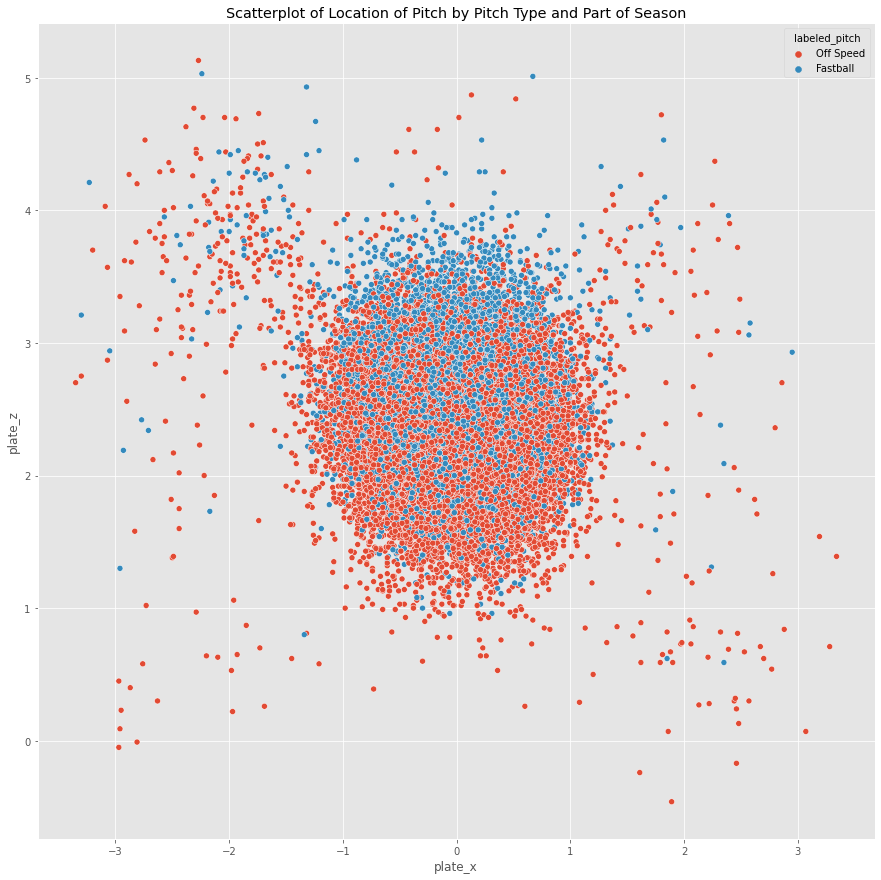

In [51]:
# Updated Plot w/ grouping by inning

plt.figure(1, figsize=(15,5))
group_pitch = pd.DataFrame(first_pitch_df.groupby(['pitch_name', 'inning']).count()['game_date']).reset_index()

sns.barplot(group_pitch.inning, group_pitch.game_date, hue=group_pitch.pitch_name)
# plt.xticks(rotation=45)
plt.title('First pitch type by Inning')
plt.show()

# want plate x and z for pitch location
plt.figure(2, figsize = (15,15))
sns.scatterplot(first_pitch_df.plate_x, first_pitch_df.plate_z, hue=first_pitch_df.labeled_pitch)
plt.title('Scatterplot of Location of Pitch by Pitch Type and Part of Season')
plt.show()